In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from xgboost import XGBClassifier
import shap

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


We'll compare with permutation importance from [this](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-multicollinear-py) page in the sklearn documentation.

In [4]:
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

xgb_model = XGBClassifier().fit(X_train, y_train)
xgb_model.score(X_test, y_test)

0.965034965034965

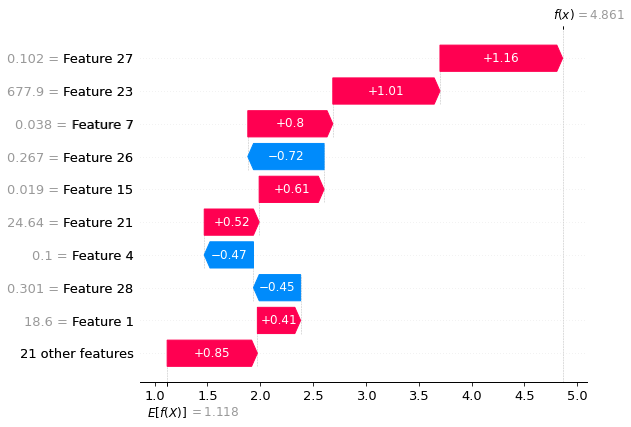

In [6]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0])